# K Nearest Neighbors Algorithm Demonstration

**The data for this project is random class data that needs to be classified, and the data is from Pieran Data.**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

## Importing the Data:

In [2]:
KNN_data = pd.read_csv('KNN_Project_Data')
KNN_data.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# Exploring the Data:

**Separating visualizations by the Target Class:**

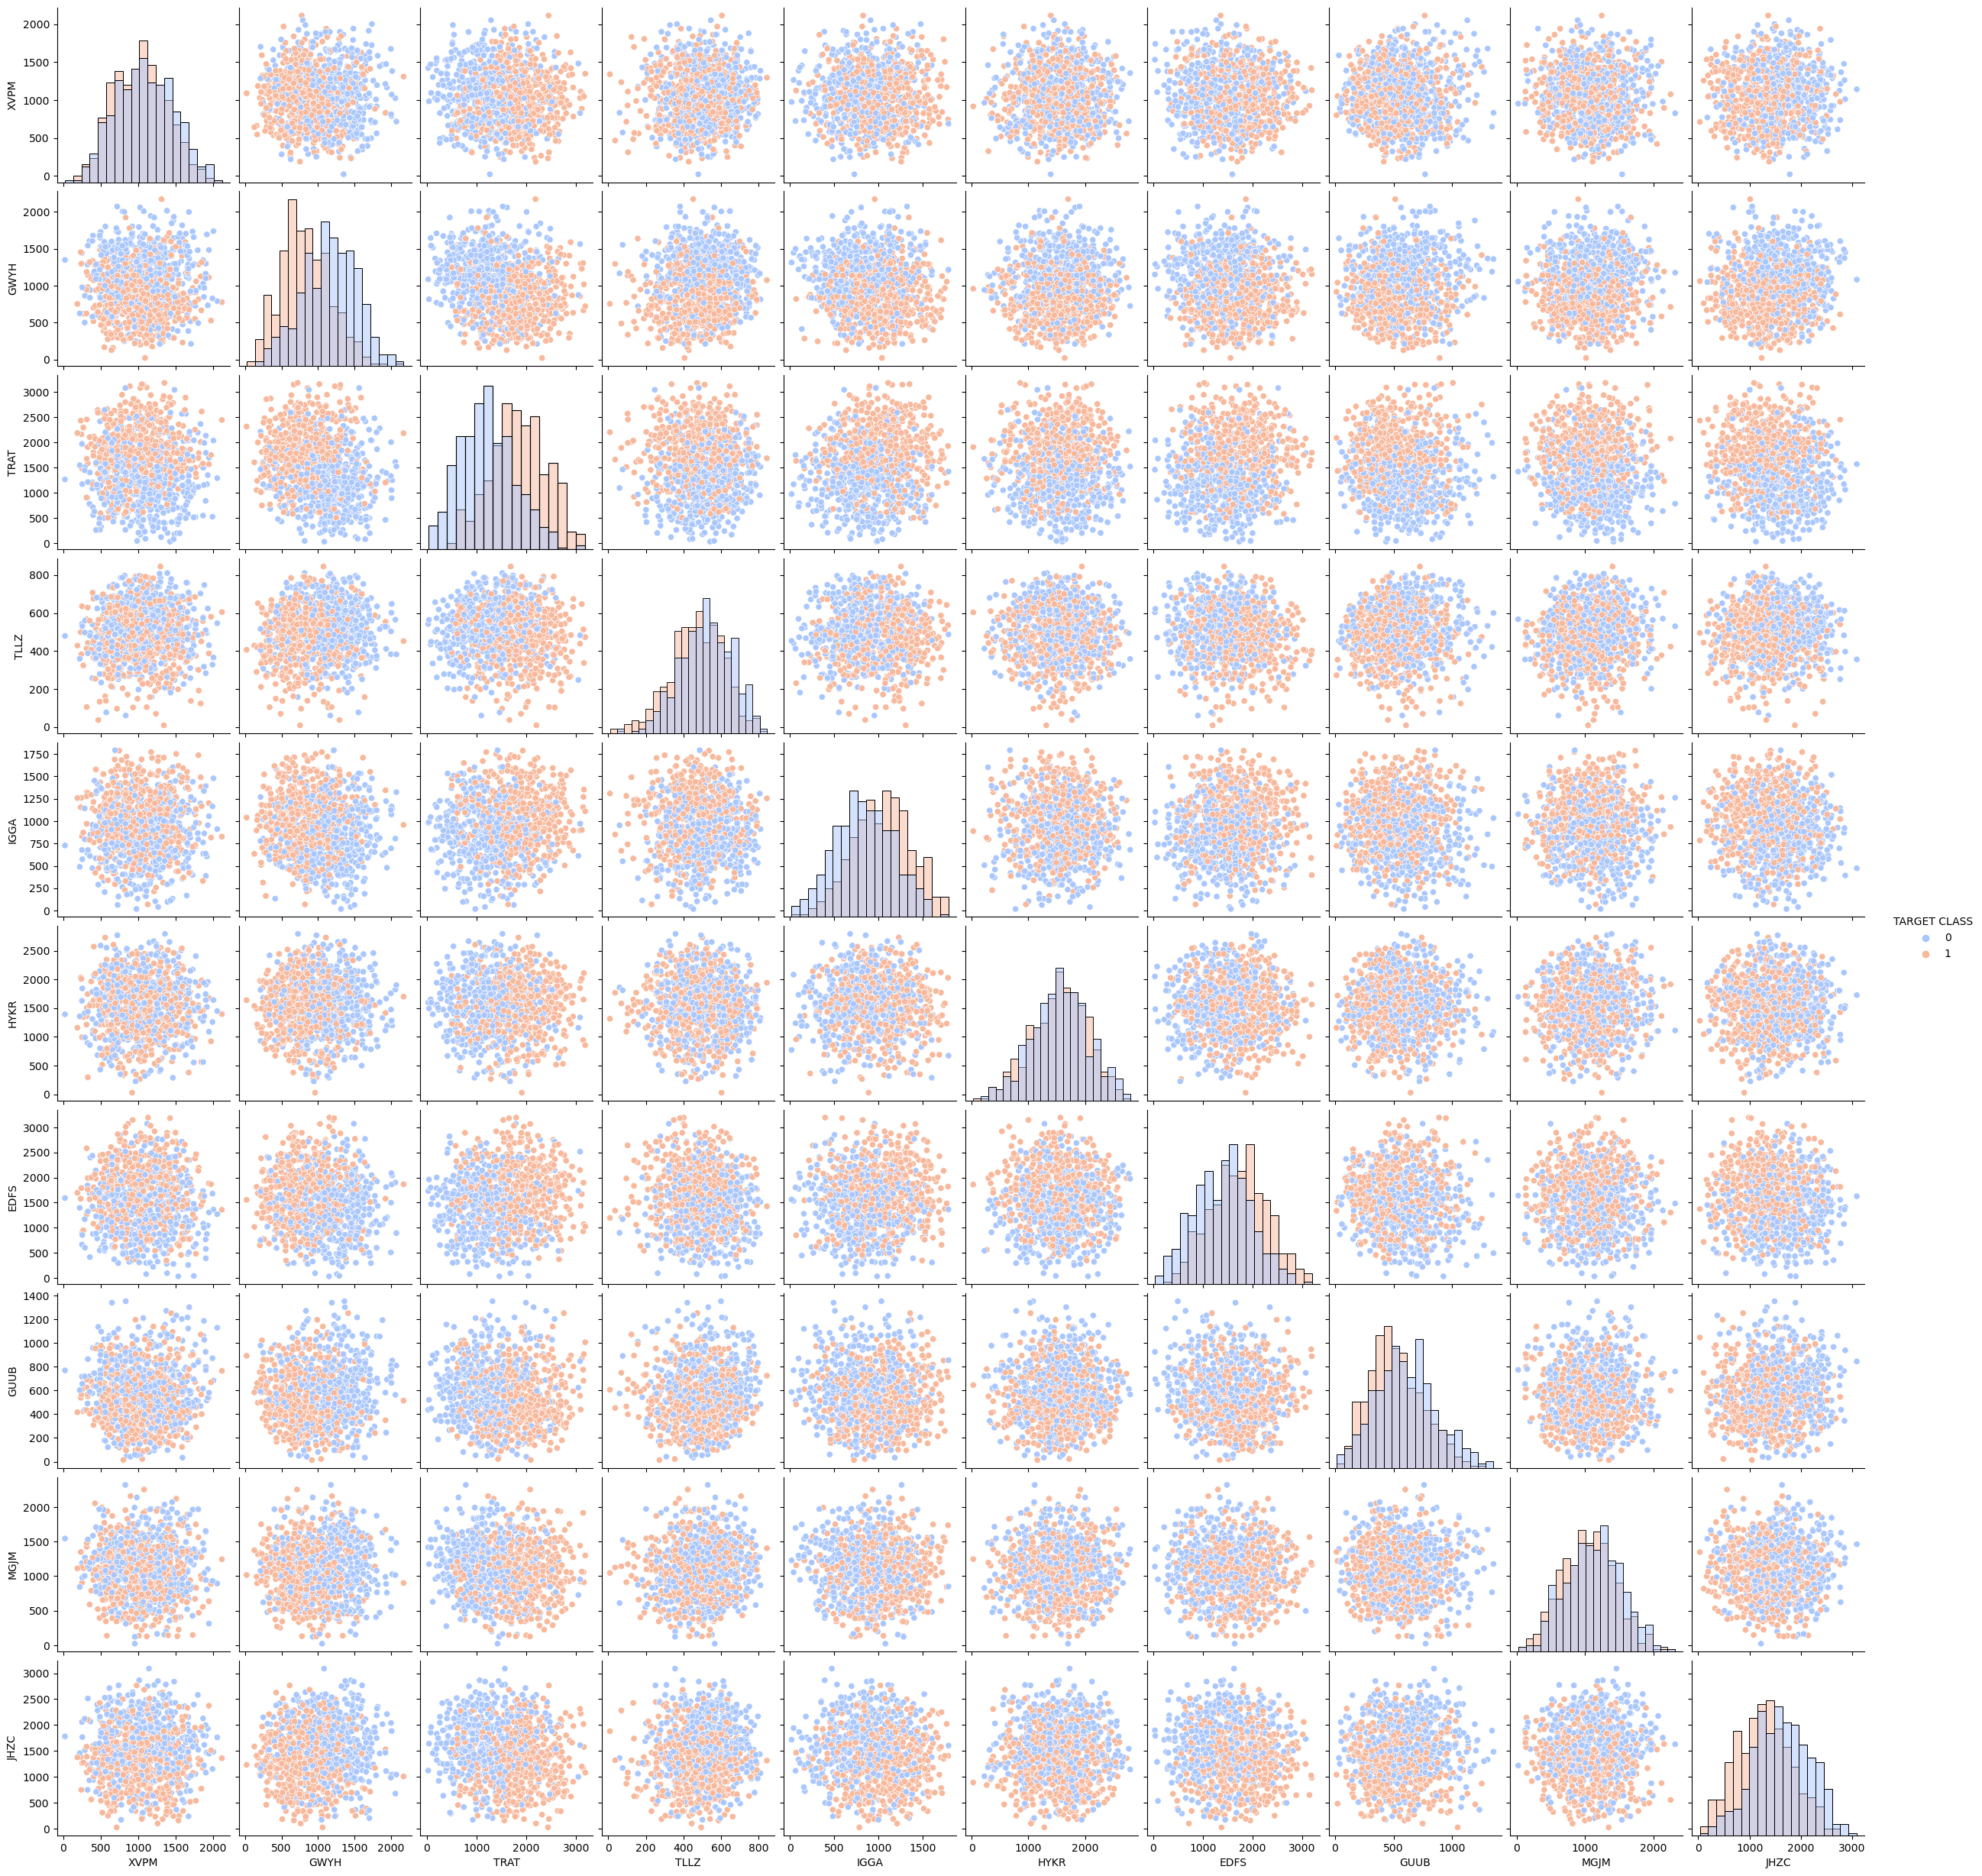

In [3]:
sns.pairplot(data = KNN_data, diag_kind='hist',hue = 'TARGET CLASS', palette = 'coolwarm')

## Standardizing the variables using scikit learn:

In [4]:
scaler = StandardScaler()

**Fitting the data to the scaled features:**

In [5]:
scaler.fit(KNN_data.drop('TARGET CLASS',axis = 1))

StandardScaler()

**Creating scaled features from the fitted data:**

In [6]:
scaled_features = scaler.transform(KNN_data.drop('TARGET CLASS',axis=1))

**Converting the scaled features to a dataframe:**

In [7]:
new_data = pd.DataFrame(scaled_features, columns = KNN_data.columns[:-1])
new_data.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

## Separating the data into training sets and test sets: 

In [8]:
X = KNN_data.drop('TARGET CLASS',axis=1)
y = KNN_data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Modeling and Predicting the data using the K-Nearest Neighbors algorithm:

**(With the number of neighboring points set to 1)**

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

prediction = knn.predict(X_test)

## Evaluating the model:

**(confusion matrix and classification report)**

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))

[[120  42]
 [ 43 125]]


              precision    recall  f1-score   support

           0       0.74      0.74      0.74       162
           1       0.75      0.74      0.75       168

    accuracy                           0.74       330
   macro avg       0.74      0.74      0.74       330
weighted avg       0.74      0.74      0.74       330



# Deciding which K Value is optimal for the model:

**Looping through an array of k-values in order to determine the error rate of each model per k-value, so that
I may plot it and choose the best value of k for the model.**

In [13]:
err_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_i = knn.predict(X_test)
    err_rate.append(np.mean(prediction_i != y_test))
#print(err_rate)

**Plotting the error rate at each k-value:**

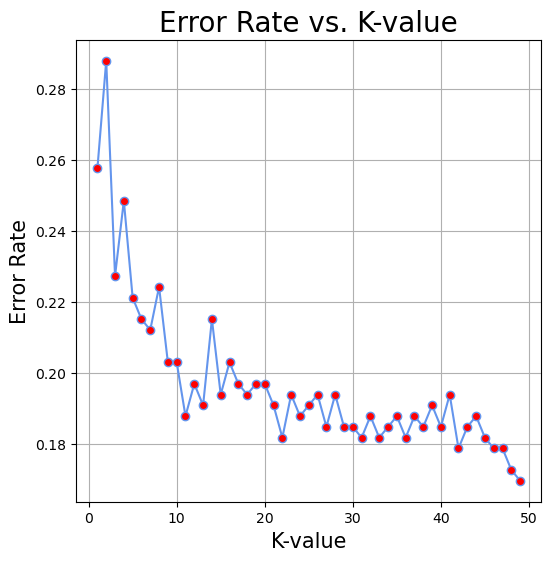

In [14]:
plt.figure(figsize = (6,6))

plt.plot(range(1,50), err_rate, color = 'cornflowerblue', linestyle = '-',marker = 'o', markerfacecolor = 'red')
plt.title('Error Rate vs. K-value',fontsize = 20)
plt.xlabel('K-value', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)
plt.grid()
plt.show()

## Testing a few k-values and evaluating the models:

**With a K-value of 10:**

In [15]:
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train,y_train)
prediction_10 = knn.predict(X_test)

print(confusion_matrix(y_test,prediction_10))
print('\n')
print(classification_report(y_test,prediction_10))

[[132  30]
 [ 26 142]]


              precision    recall  f1-score   support

           0       0.84      0.81      0.82       162
           1       0.83      0.85      0.84       168

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



**With a K-value of 36:**

In [16]:
knn_36 = KNeighborsClassifier(n_neighbors=36)
knn_36.fit(X_train,y_train)
prediction_36 = knn.predict(X_test)

print(confusion_matrix(y_test,prediction_36))
print('\n')
print(classification_report(y_test,prediction_36))

[[132  30]
 [ 26 142]]


              precision    recall  f1-score   support

           0       0.84      0.81      0.82       162
           1       0.83      0.85      0.84       168

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



**With a K-value of 49:**

In [17]:
knn_49 = KNeighborsClassifier(n_neighbors=49)
knn_49.fit(X_train,y_train)
prediction_49 = knn.predict(X_test)

print(confusion_matrix(y_test,prediction_49))
print('\n')
print(classification_report(y_test,prediction_49))

[[132  30]
 [ 26 142]]


              precision    recall  f1-score   support

           0       0.84      0.81      0.82       162
           1       0.83      0.85      0.84       168

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



**The model predicts best beyond k-values of 10. Beyond a k-value equal to ten the model does not predict with higher precision.**